In [30]:
import pandas as pd
%matplotlib inline
import pylab as plt
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

In [31]:
df = pd.read_csv("students.csv")

In [32]:
df.head()

,sex,age,Medu,Fedu,Mjob,Fjob,reason,studytime,failures,schoolsup
0,F,18,4,4,at_home,teacher,course,2,0,yes
1,F,17,1,1,at_home,other,course,2,0,no
2,F,15,1,1,at_home,other,other,2,3,yes
3,F,15,4,2,health,services,home,3,0,no
4,F,16,3,3,other,other,home,2,0,no


# 	Descriptive statistics (Data Analysis + Visualization).

In [4]:
df.describe()

,age,Medu,Fedu,studytime,failures
count,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,2.035443,0.334177
std,1.276043,1.094735,1.088201,0.839240,0.743651
min,15.000000,0.000000,0.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,0.000000
50%,17.000000,3.000000,2.000000,2.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,0.000000
max,22.000000,4.000000,4.000000,4.000000,3.000000


In [5]:
df.mean()

age          16.696203
Medu          2.749367
Fedu          2.521519
studytime     2.035443
failures      0.334177
dtype: float64

In [6]:
lm1 = df.groupby(['sex']).count()
m1 = lm1['schoolsup']
m1

sex
F    208
M    187
Name: schoolsup, dtype: int64

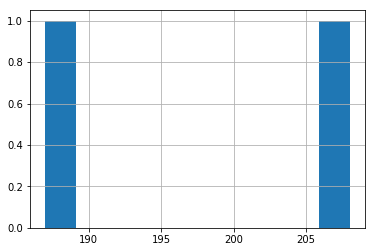

In [7]:
m1.hist();

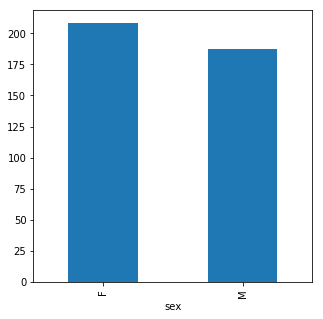

In [11]:
m1.plot(kind='bar',figsize=(5,5));

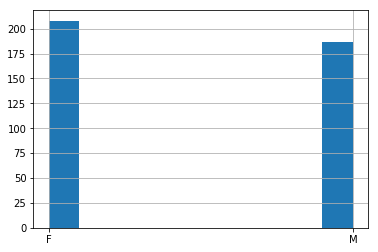

In [90]:
df['sex'].hist();

In [12]:
lm2= df.groupby(['age']).count()
m2 =lm2['schoolsup']
m2

age
15     82
16    104
17     98
18     82
19     24
20      3
21      1
22      1
Name: schoolsup, dtype: int64

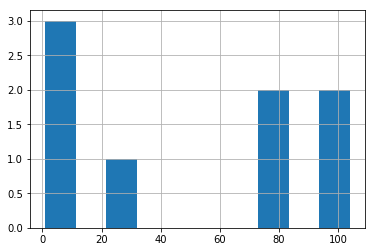

In [13]:
m2.hist();

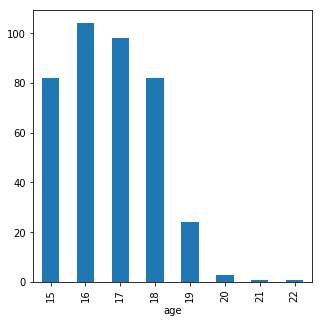

In [14]:
m2.plot(kind='bar',figsize=(5,5));

In [15]:
lm3= df.groupby(['sex','studytime']).count()
m3 =lm3['schoolsup']
m3

sex  studytime
F    1             27
     2            113
     3             51
     4             17
M    1             78
     2             85
     3             14
     4             10
Name: schoolsup, dtype: int64

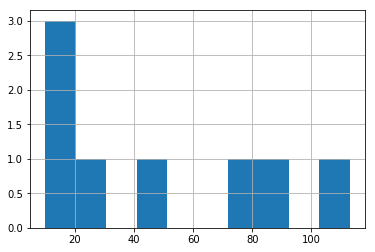

In [16]:
m3.hist();

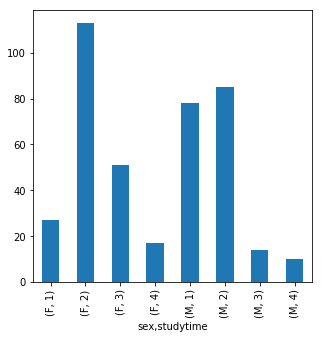

In [17]:
m3.plot(kind='bar',figsize=(5,5));

In [18]:
lm4= df.groupby(['sex','failures']).count()
m4 =lm4['schoolsup']
m4

sex  failures
F    0           168
     1            23
     2            11
     3             6
M    0           144
     1            27
     2             6
     3            10
Name: schoolsup, dtype: int64

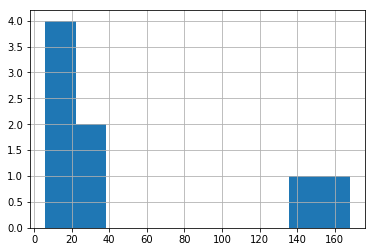

In [19]:
m4.hist();

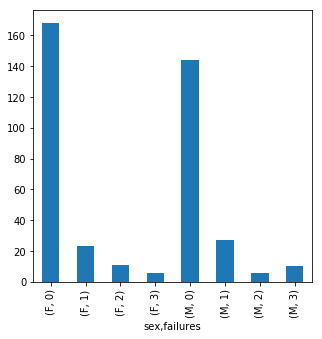

In [20]:
m4.plot(kind='bar',figsize=(5,5));

In [24]:
lm5= df.groupby(['failures']).count()
m5 =lm5['schoolsup']
m5

failures
0    312
1     50
2     17
3     16
Name: schoolsup, dtype: int64

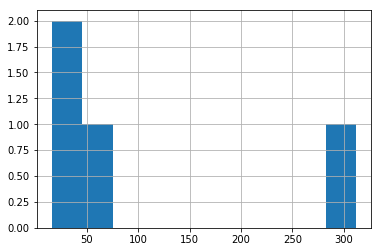

In [25]:
m5.hist();

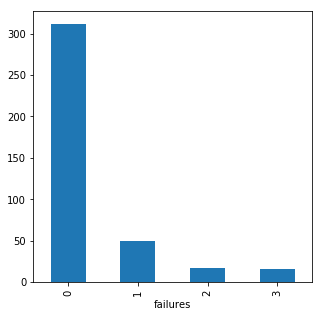

In [26]:
m5.plot(kind='bar',figsize=(5,5));

# Feature Engineering 

In [33]:
df.columns


Index(['sex', 'age', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'studytime',
       'failures', 'schoolsup'],
      dtype='object')

In [34]:
df =df[['sex','age','studytime','failures','schoolsup']]

In [35]:
df.head()

,sex,age,studytime,failures,schoolsup
0,F,18,2,0,yes
1,F,17,2,0,no
2,F,15,2,3,yes
3,F,15,3,0,no
4,F,16,2,0,no


# Missing values treatment

In [36]:
df.isnull().sum()

sex          0
age          0
studytime    0
failures     0
schoolsup    0
dtype: int64

# Label encoding

In [37]:
df.head()

,sex,age,studytime,failures,schoolsup
0,F,18,2,0,yes
1,F,17,2,0,no
2,F,15,2,3,yes
3,F,15,3,0,no
4,F,16,2,0,no


In [38]:
df.columns

Index(['sex', 'age', 'studytime', 'failures', 'schoolsup'], dtype='object')

In [39]:
sex_encoder = LabelEncoder()
df['sex'] = sex_encoder.fit_transform(df['sex'].values)

In [40]:
schoolsup_encoder = LabelEncoder()
df['schoolsup'] = schoolsup_encoder.fit_transform(df['schoolsup'].values)

In [41]:
df.head()

,sex,age,studytime,failures,schoolsup
0,0,18,2,0,1
1,0,17,2,0,0
2,0,15,2,3,1
3,0,15,3,0,0
4,0,16,2,0,0


# shrinks data

In [56]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

In [59]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [60]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Yara Sabry\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [61]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [63]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[84,  0],
       [15,  0]], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,y_pred,normalize=False)


84

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92        84
          1       0.00      0.00      0.00        15

avg / total       0.72      0.85      0.78        99



C:\Users\Yara Sabry\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
